# Homework 2 - Classification

In this exercise you will use scikit-learn, a popular machine learning package in python to train and tune a classifier. A particularly useful feature is that all classifiers (and linear models) are called using the same API, so it is easy to test between different models (see the sklearn-intro notebook for examples). So in this exercise we will a classification technique (logistic regression) that is representative of methods and challenges you will encounter when using any classification method.


## Dataset
We will be using a banking marketing dataset. 
The dataset is associated with direct marketing campaigns of a banking institution. Your job is to find out the best strategies to improve for the next marketing campaign. How can the bank have a greater effectiveness for future marketing campaigns? In order to answer this, we have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies.

You have to predict whether a customer subscribes for term deposit or not using the following attributes: 

1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - balance: balance amount (numeric)<br>
7 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
8 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>
8 - contact: contact communication type (categorical: 'cellular','telephone')<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>

features_ex2.xlsx contains the features. It has 4521 records. First 3165 observations are used for training dataset, next 678 observations are used for cross validation dataset and final 678 observations are used for test dataset.

label_ex2.xlsx contains the label: "yes" or "no". First 3165 observations are used for training dataset, next 678 observations are used for cross validation dataset. Labels for test dataset are not provided to you because in a real world scenario you will not know the true values for your test set. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
X = pd.read_excel("features_ex2.xlsx")
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,-1,0,unknown
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,339,4,failure
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,330,1,failure
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,-1,0,unknown


In [3]:
y = pd.read_excel("label_ex2.xlsx")
y.head()

,y
0,no
1,no
2,no
3,no
4,no


In [4]:
# Converting strings to binary variables
mapping = {'yes': 1, 'no': 0}
y.y = [mapping[i] for i in y.y]
y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [5]:
categories = ['job','marital','education','default','housing','loan','contact','month','poutcome']
categorical = pd.get_dummies(X[categories])
continuous = X.drop(columns=categories)
X = pd.concat([continuous,categorical],axis=1)

In [6]:
# splitting data into train, cv and test set (70:15:15 ratio)
X_train = X.iloc[0:3165,:].copy()
y_train = y.iloc[0:3165,:].copy()
X_cv = X.iloc[3165:3843,:].copy()
y_cv = y.iloc[3165:3843,:].copy()
X_test = X.iloc[3843:4521,:].copy()

In [7]:
print("X_train "+ str(X_train.shape))
print("y_train "+ str(y_train.shape))
print("X_cv "+ str(X_cv.shape))
print("y_cv "+ str(y_cv.shape))
print("X_test "+ str(X_test.shape))

X_train (3165, 50)
y_train (3165, 1)
X_cv (678, 50)
y_cv (678, 1)
X_test (678, 50)


## Standardization

As discussed in previous exercise, standardization is important when a number of features with different scales are involed. 

Q. Use StandardScaler from sklearn.preprocessing to standardize the continuous features. 


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

continuous_variables = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']

# Use the above list to replace the continuous columns in X_train to scaled columns. Use fit_transform method.

X_train[continuous_variables] = scaler.fit_transform(X_train[continuous_variables])

In [9]:
# Similarily use the above list to replace the continuous columns in X_cv and X_test to scaled columns. 
# Use transform method.
### WRITE CODE HERE

X_cv[continuous_variables] = scaler.transform(X_cv[continuous_variables])
X_test[continuous_variables] = scaler.transform(X_test[continuous_variables])

## Classification

As previously mentioned, the scikit-learn classification API makes it easy to train a classifier. 


Q. Use LogisticRegression from sklearn.linear_model to make a logistic regression classifier.

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [12]:
# First, initialize the classifier with default parameters

# then fit the classifier on training data and labels

### WRITE CODE HERE
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
# predict the output for cross validation dataset

### WRITE CODE HERE

y_cv_pred = logisticRegr.predict(X_cv)

Implement precision(), recall(), accuracy() in exercise_2.py, and use them below.

In [14]:
from classification_utils import accuracy, precision, recall
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [15]:
# Using the predictions to calculate accuracy, precision, recall

### WRITE CODE HERE

acc = accuracy(y_cv.values.ravel(), y_cv_pred)
prec = precision(y_cv.values.ravel(), y_cv_pred)
rec = recall(y_cv.values.ravel(), y_cv_pred)

# Checking with sklearn 
acc_score = logisticRegr.score(X_cv, y_cv)
prec_score = precision_score(y_cv, y_cv_pred)
rec_score = recall_score(y_cv, y_cv_pred)

print(f'{"Accuracy":<9}|| {"sklearn_check":<10}')
print(f'{round(acc,3):<9}|| {round(acc_score,3):<10}')

print(f'{"Precision":<9}|| {"sklearn_check":<10}')
print(f'{round(prec,3):<9}|| {round(prec_score,3):<10}')    

print(f'{"Recall":<9}|| {"sklearn_check":<10}')
print(f'{round(rec,3):<9}|| {round(rec_score,3):<10}')

Accuracy || sklearn_check
0.891    || 0.891     
Precision|| sklearn_check
0.45     || 0.45      
Recall   || sklearn_check
0.125    || 0.125     


Q. Accuracy<br>
Ans - 89.1%

Q. Precision<br>
Ans - 45%

Q. Recall<br>
Ans - 12.5%

Q. Which metric (accuracy, precision, recall) is more appropriate and in what cases? Will there be scenarios where it is better to use precision than accuracy? Explain. <br>

Ans - Accuracy is a basic metric representing the fraction of correctly predicted values. In most cases it's more than enough for result checking. However, sometimes we can have an 'imbalanced classification problem' where our classes are not equally represented. As an example we can take terrorist detection in airports and disease diagnosing. In case of terrorist detection we can obtain very high accuracy simply labeling all the passengers as not terrorists but logically it would not be a good model. That's where we use precision or recall as metrics. 

These metrics are in trade-off, higher recall leads to lower precision and vice-versa. In some cases (when we have a high cost of false negative) such as disease detection we would like to maximize recall to detect all patients who actially have the disease. In other hand if we have a high cost of false positive (for example spam detection) we should pick precision as our main metric. 

Q. Which metric is suitable in this case? <br>
Ans - In this case we have 90 % of 'no' and 10% of 'yes' variables so that said we are dealing with highly skewed data. Since for marketing campaign budgeting it's important to justify the investments and hit the target amount of subsciptions we would like to choose precision in this case. 

### ROC curve

Q. Use roc_Curve from sklearn.metrics and use matplotlib.pyplot to plot the ROC curve. Use cv set to make predictions.

In [25]:
logisticRegr.predict_proba(X_cv)

array([[0.89841296, 0.10158704],
       [0.92794599, 0.07205401],
       [0.94355608, 0.05644392],
       ...,
       [0.94322324, 0.05677676],
       [0.88577792, 0.11422208],
       [0.75362159, 0.24637841]])

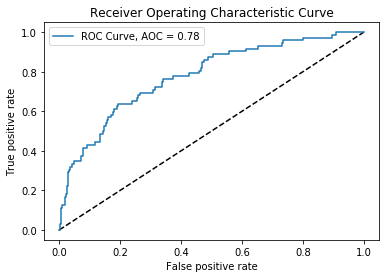

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# calculate the fpr and tpr for all thresholds of the classification

### WRITE CODE HERE

fpr, tpr, thresholds = roc_curve(y_cv.values.ravel(), logisticRegr.predict_proba(X_cv)[:,1])
auc = roc_auc_score(y_cv.values.ravel(), logisticRegr.predict_proba(X_cv)[:,1])

import matplotlib.pyplot as plt
# Plot the ROC curve by giving appropriate names for title and axes. 

### WRITE CODE HERE
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f'ROC Curve, AOC = {round(auc,2)}')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='best')
plt.show()

Q. What is the AOC obtained?<br>
Ans - 0.78

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data. This is separate from "fitting" or "training" the model. The fitting/training procedure is governed by the amount and quality of your training data, as the fitting algorithm is unique to each classifier (e.g. logistic regression or random forest). 





Build a model with hyperparameter 'C' set to 0.1 and penalty set to 'l1'. Make predictions on cross validation set and compute accuracy, precision and recall. 


In [17]:
### WRITE CODE HERE

logisticRegr2 = LogisticRegression(penalty = 'l1', C = 0.1)
logisticRegr2.fit(X_train, y_train.values.ravel())

y_cv_pred2 = logisticRegr2.predict(X_cv)

acc_mod2 = accuracy(y_cv.values.ravel(), y_cv_pred2)
prec_mod2 = precision(y_cv.values.ravel(), y_cv_pred2)
rec_mod2 = recall(y_cv.values.ravel(), y_cv_pred2)

acc_score_mod2 = logisticRegr2.score(X_cv, y_cv)
prec_score_mod2 = precision_score(y_cv, y_cv_pred2)
rec_score_mod2 = recall_score(y_cv, y_cv_pred2)

print(f'{"Accuracy":<9}|| {"sklearn_check":<10}')
print(f'{round(acc_mod2,3):<9}|| {round(acc_score_mod2,3):<10}')

print(f'{"Precision":<9}|| {"sklearn_check":<10}')
print(f'{round(prec_mod2,3):<9}|| {round(prec_score_mod2,3):<10}')    

print(f'{"Recall":<9}|| {"sklearn_check":<10}')
print(f'{round(rec_mod2,3):<9}|| {round(rec_score_mod2,3):<10}')

Accuracy || sklearn_check
0.898    || 0.898     
Precision|| sklearn_check
0.6      || 0.6       
Recall   || sklearn_check
0.125    || 0.125     


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l1'. Make predictions on cross validation set and compute accuracy, precision and recall. 


In [18]:
### WRITE CODE HERE

logisticRegr3 = LogisticRegression(penalty = 'l1', C = 0.5)
logisticRegr3.fit(X_train, y_train.values.ravel())

y_cv_pred3 = logisticRegr3.predict(X_cv)

acc_mod3 = accuracy(y_cv.values.ravel(), y_cv_pred3)
prec_mod3 = precision(y_cv.values.ravel(), y_cv_pred3)
rec_mod3 = recall(y_cv.values.ravel(), y_cv_pred3)

acc_score_mod3 = logisticRegr3.score(X_cv, y_cv)
prec_score_mod3 = precision_score(y_cv, y_cv_pred3)
rec_score_mod3 = recall_score(y_cv, y_cv_pred3)

print(f'{"Accuracy":<9}|| {"sklearn_check":<10}')
print(f'{round(acc_mod3,3):<9}|| {round(acc_score_mod3,3):<10}')

print(f'{"Precision":<9}|| {"sklearn_check":<10}')
print(f'{round(prec_mod3,3):<9}|| {round(prec_score_mod3,3):<10}')    

print(f'{"Recall":<9}|| {"sklearn_check":<10}')
print(f'{round(rec_mod3,3):<9}|| {round(rec_score_mod3,3):<10}')

Accuracy || sklearn_check
0.894    || 0.894     
Precision|| sklearn_check
0.5      || 0.5       
Recall   || sklearn_check
0.139    || 0.139     


Build a model with hyperparameter 'C' set to 0.1 and penalty set to 'l2'. Make predictions on cross validation set and compute accuracy, precision and recall. 


In [19]:
### WRITE CODE HERE

logisticRegr4 = LogisticRegression(penalty = 'l2', C = 0.1)
logisticRegr4.fit(X_train, y_train.values.ravel())

y_cv_pred4 = logisticRegr4.predict(X_cv)

acc_mod4 = accuracy(y_cv.values.ravel(), y_cv_pred4)
prec_mod4 = precision(y_cv.values.ravel(), y_cv_pred4)
rec_mod4 = recall(y_cv.values.ravel(), y_cv_pred4)

acc_score_mod4 = logisticRegr4.score(X_cv, y_cv)
prec_score_mod4 = precision_score(y_cv, y_cv_pred4)
rec_score_mod4 = recall_score(y_cv, y_cv_pred4)

print(f'{"Accuracy":<9}|| {"sklearn_check":<10}')
print(f'{round(acc_mod4,3):<9}|| {round(acc_score_mod4,3):<10}')

print(f'{"Precision":<9}|| {"sklearn_check":<10}')
print(f'{round(prec_mod4,3):<9}|| {round(prec_score_mod4,3):<10}')    

print(f'{"Recall":<9}|| {"sklearn_check":<10}')
print(f'{round(rec_mod4,3):<9}|| {round(rec_score_mod4,3):<10}')

Accuracy || sklearn_check
0.898    || 0.898     
Precision|| sklearn_check
0.6      || 0.6       
Recall   || sklearn_check
0.125    || 0.125     


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l2'. Make predictions on cross validation set and compute accuracy, precision and recall. 

In [20]:
### WRITE CODE HERE

logisticRegr5 = LogisticRegression(penalty = 'l2', C = 0.5)
logisticRegr5.fit(X_train, y_train.values.ravel())

y_cv_pred5 = logisticRegr5.predict(X_cv)

acc_mod5 = accuracy(y_cv.values.ravel(), y_cv_pred5)
prec_mod5 = precision(y_cv.values.ravel(), y_cv_pred5)
rec_mod5 = recall(y_cv.values.ravel(), y_cv_pred5)

acc_score_mod5 = logisticRegr5.score(X_cv, y_cv)
prec_score_mod5 = precision_score(y_cv, y_cv_pred5)
rec_score_mod5 = recall_score(y_cv, y_cv_pred5)

print(f'{"Accuracy":<9}|| {"sklearn_check":<10}')
print(f'{round(acc_mod5,3):<9}|| {round(acc_score_mod5,3):<10}')

print(f'{"Precision":<9}|| {"sklearn_check":<10}')
print(f'{round(prec_mod5,3):<9}|| {round(prec_score_mod5,3):<10}')    

print(f'{"Recall":<9}|| {"sklearn_check":<10}')
print(f'{round(rec_mod5,3):<9}|| {round(rec_score_mod5,3):<10}')

Accuracy || sklearn_check
0.892    || 0.892     
Precision|| sklearn_check
0.474    || 0.474     
Recall   || sklearn_check
0.125    || 0.125     


Q. Which of the above models is better? <br>
Ans- Two models with 'l1' and 'l2' having C = 0.1 are equally good, but since 'l1' model is simpler - and thus, computationally cheaper (because of lasso regularization) we would prefer the model with 'l1' and C = 0.1

# Test set

You have worked on training and cv dataset so far, but testing data does not include the labels. Choose the best hyperparameter values as seen in previous section and build a model. Use this model to make predictions on test set. You will submit a csv file containing your predictions names as predictions.csv.


In [21]:
##########################################
### Construct your final logistic regression using the best hyperparameters obtained above(C and penalty) ###
final_model = logisticRegr2
final_model.fit(X_train, y_train.values.ravel())
predicted = final_model.predict(X_test)

# Converting binary variables back to strings 
mapping = {1: 'yes', 0:'no'}
predicted = [mapping[i] for i in predicted]

### save into csv with column heading as "y"
pred_df = pd.DataFrame(predicted, columns = ['y'])
pred_df.to_csv('result.csv',index = False)

In [22]:
#end 